<a href="https://colab.research.google.com/github/Aya-Jafar/Machine_Learning_for_Climate_Change/blob/main/Week%2005_%20Advanced%20Machine%20Learning/Week_05_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05:


In This Week's assignment, we will use machine learning models to classify the electric grid stability.


Before starting copy this file and work on your own copy by following the below steps:

<br>

`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 05: - Muntahder Al-kaabi).

<br>

Requirements:
1. Download the data
1. Import all necessary libraries.
2. Read the dataset.
3. Drop the unnecessary column.
5. Get the number of missing values.
3. Plot the target column.
4. Write a tokenizer function.
5. Tokenize the target column.
3. Describe the dataset.
3. Show the dataset info.
4. Fill the missing values.
3. Show the new dataset info and description.
3. Balance the dataset.
3. Split the data to feature and target.
3. Define a function to split the data.
3. Normalize the features.
3. Get the best number of columns.
3. Modeling




Good luck and feel free to ask any question.

# Download the data

In [ ]:
!wget https://raw.githubusercontent.com/computiq-training/Machine_Learning_for_Climate_Change/main/Week%2005_%20Advanced%20Machine%20Learning/data_Class.csv

--2022-11-28 16:55:05--  https://raw.githubusercontent.com/computiq-training/Machine_Learning_for_Climate_Change/main/Week%2005_%20Advanced%20Machine%20Learning/data_Class.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12305265 (12M) [text/plain]
Saving to: ‘data_Class.csv.1’

data_Class.csv.1    100%[===================>]  11.73M  --.-KB/s    in 0.08s   

2022-11-28 16:55:06 (150 MB/s) - ‘data_Class.csv.1’ saved [12305265/12305265]



# Import all necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import datasets, model_selection, svm, metrics, pipeline, preprocessing,impute,feature_selection

# Read the dataset


In [ ]:
df = pd.read_csv('data_Class.csv')
df

,Unnamed: 0,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,NaN,0.958034,unstable
1,1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,NaN,0.781760,stable
2,2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,NaN,-0.920492,0.163041,0.766689,0.839444,NaN,unstable
3,3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,4,3.134112,7.608772,4.943759,9.857573,3.525811,NaN,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,NaN,unstable
59996,59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,stable
59997,59997,2.364034,8.776391,2.842030,1.008906,4.299976,NaN,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,stable
59998,59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,NaN,-0.898510,0.365246,0.889118,0.587558,0.818391,unstable


# Drop the unnecessary column

In [ ]:
# drop the Unnamed: 0 column 
df.drop(df.columns[0],inplace=True,axis=1)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,NaN,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,NaN,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,NaN,-0.920492,0.163041,0.766689,0.839444,NaN,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,NaN,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,NaN,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,NaN,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,NaN,-0.898510,0.365246,0.889118,0.587558,0.818391,unstable


# Get the number of missing values

In [ ]:
df.isna().sum()

tau1     6000
tau2     6000
tau3     6000
tau4     6000
p1       6000
p2       6000
p3       6000
p4       6000
g1       6000
g2       6000
g3       6000
g4       6000
stabf       0
dtype: int64

# Plot the target column

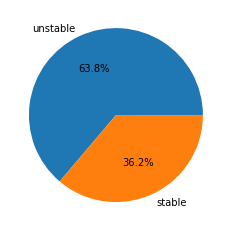

In [ ]:
plt.pie(df['stabf'].value_counts(),
        labels=df['stabf'].unique(),
         autopct='%.1f%%'
        )
plt.show()

expected output

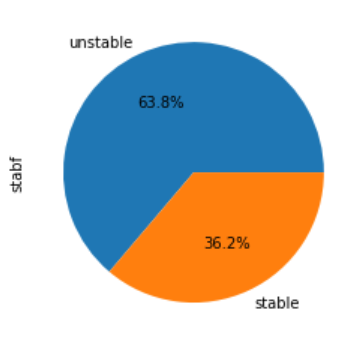

# Write a tokenizer function

In [ ]:
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id 
        id_word[id] = word
    return word_id,id_word

# Tokenize the target column

In [ ]:
# Get the label to id and id to label dictdictionary 
label_id,id_label = tokenizer(df.stabf)
# Convert the labels to ids using the label_id dictionary 
df.stabf.replace(label_id,inplace=True)

In [ ]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,NaN,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,NaN,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,NaN,-0.920492,0.163041,0.766689,0.839444,NaN,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,NaN,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,NaN,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,NaN,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,NaN,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [ ]:
df.reset_index(inplace=True,drop=True)

# Describe the dataset

In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,60000.000000
mean,5.253466,5.251976,5.253370,5.251482,3.749531,-1.250741,-1.250092,-1.250037,0.525128,0.525067,0.525471,0.525196,0.362000
std,2.743338,2.742172,2.740939,2.741932,0.752375,0.433291,0.433247,0.433262,0.274384,0.273969,0.274488,0.274080,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,0.000000
25%,2.870886,2.880617,2.884743,2.875011,3.217786,-1.626414,-1.625495,-1.626430,0.287457,0.288089,0.287865,0.288172,0.000000
50%,5.263281,5.256673,5.248703,5.255941,3.752261,-1.252050,-1.250367,-1.248933,0.524905,0.524668,0.525448,0.524696,0.000000
75%,7.627383,7.624829,7.628681,7.620590,4.282255,-0.875323,-0.875069,-0.875244,0.763307,0.762372,0.763305,0.762410,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,1.000000


# Show the dataset info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    54000 non-null  float64
 1   tau2    54000 non-null  float64
 2   tau3    54000 non-null  float64
 3   tau4    54000 non-null  float64
 4   p1      54000 non-null  float64
 5   p2      54000 non-null  float64
 6   p3      54000 non-null  float64
 7   p4      54000 non-null  float64
 8   g1      54000 non-null  float64
 9   g2      54000 non-null  float64
 10  g3      54000 non-null  float64
 11  g4      54000 non-null  float64
 12  stabf   60000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 6.0 MB



# Fill the missing values using machine learning

In [ ]:
# initialize the Multivariate Feature Imputation
imp = impute.KNNImputer(n_neighbors=5)
# Fit impute on the dataset 
imp.fit(df)
# Imputation of missing values
new_dataset_imp = imp.transform(df)

In [ ]:
# Create DataFrame from new_dataset_imp
new_df = pd.DataFrame(new_dataset_imp,columns=df.columns)
new_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.682909,0.958034,0.0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.411463,0.781760,1.0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.100605,-0.920492,0.163041,0.766689,0.839444,0.611790,0.0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.061900,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.628411,0.0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1.0
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-1.284976,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1.0
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.957788,-0.898510,0.365246,0.889118,0.587558,0.818391,0.0


# Show the new dataset info and description

In [ ]:
new_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.258001,5.258428,5.254883,5.251951,3.750189,-1.249123,-1.249290,-1.250152,0.525872,0.525432,0.526990,0.525487,0.362000
std,2.635868,2.636257,2.633871,2.636885,0.733286,0.417852,0.418095,0.417894,0.263893,0.263243,0.263827,0.263609,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,0.000000
25%,3.081894,3.086377,3.088770,3.077236,3.238746,-1.596329,-1.596606,-1.597241,0.308250,0.308718,0.309899,0.308270,0.000000
50%,5.274830,5.282340,5.266536,5.266074,3.752747,-1.248093,-1.248689,-1.248605,0.526914,0.526641,0.529919,0.525988,0.000000
75%,7.415212,7.418741,7.414683,7.415081,4.263208,-0.903293,-0.902329,-0.903684,0.743497,0.741502,0.743488,0.742282,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,1.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stabf   60000 non-null  float64
dtypes: float64(13)
memory usage: 6.0 MB


# Balance the dataset

In [ ]:
new_df.stabf.value_counts()

0.0    38280
1.0    21720
Name: stabf, dtype: int64

In [ ]:
new_dataset = new_df[new_df.stabf == 1]
new_dataset = new_dataset.append( new_df[new_df.stabf==0].sample(n=20000,random_state=42))
new_dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.411463,0.781760,1.0
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.513955,0.261793,0.077930,0.542884,0.469931,1.0
8,4.689852,4.007747,1.478573,4.519433,3.794474,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,1.0
10,5.930110,6.730873,6.245138,0.533288,2.755184,-0.702501,-1.116920,-0.507671,0.239816,0.254081,0.164461,0.753701,1.0
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.281431,0.077610,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28521,4.057284,4.517588,0.833689,5.056221,4.358063,-1.836614,-1.242284,-1.279164,0.872024,0.669675,0.791965,0.198500,0.0
29190,5.583553,5.575402,3.882967,9.354082,3.326324,-1.081205,-0.723041,-1.522078,0.605701,0.786296,0.893365,0.714324,0.0
53366,7.054571,6.187938,8.706000,7.050216,4.731975,-1.639130,-1.888046,-1.204799,0.992215,0.143562,0.576792,0.559103,0.0
23454,5.312771,9.313984,5.598046,5.700490,3.873806,-1.117613,-0.935181,-1.774501,0.556648,0.696745,0.617441,0.933072,0.0


In [ ]:
new_dataset.stabf.value_counts()

1.0    21720
0.0    20000
Name: stabf, dtype: int64

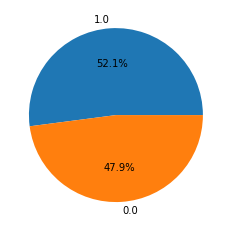

In [ ]:
plt.pie( new_dataset.stabf.value_counts(),
         labels=new_dataset.stabf.unique(),
         autopct='%.1f%%')
plt.show()

# Split the dataset to target and features

In [ ]:
x = new_dataset.drop(columns=['stabf'])
y = new_dataset.stabf

In [ ]:
y = y.to_numpy()

# Define a function to split our dataset into train/test splits using indices for the cross validation 

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x,y,train_indices,test_indices):
  return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

# Normalize the features using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the features using Standard Scaler
x_normalizer = preprocessing.StandardScaler()
x_normalizer.fit(x )
x_norm = x_normalizer.transform(x)

# Get the Best Number of Columns to Selected using Cross Valuation 


In [ ]:
# Define the cross validation method
kfold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42)
# Define empty dictionary for records
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}

for k in tqdm(range(len(x.columns))):
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create the model
    lsvc = svm.SVC(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvc,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)
    # get the new fetures 
    new_x = feature_selector.transform(x_norm)

    # Evaluate model on the features for defiant k 

    for train_indexes,test_indexes in kfold.split(new_x,y):
        x_train,x_test,y_train,y_test = train_test_split(new_x, y ,train_indexes,test_indexes)

        model = svm.SVC()
        model.fit(x_train,y_train)
        pred = model.predict(x_test) 

        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))

    best_k['k'].append(k)
    best_k['f1_score'].append( np.mean(f1_score))
    best_k['recall_score'].append(np.mean( recall_score))
    best_k['precision_score'].append( np.mean(precision_score))

100%|██████████| 12/12 [2:55:39<00:00, 878.31s/it]


In [ ]:
# Conver scores array to dataframe
k_scores_df = pd.DataFrame(best_k)
k_scores_df

,k,f1_score,recall_score,precision_score
0,1,0.598469,0.547698,0.659709
1,2,0.687138,0.689365,0.684963
2,3,0.728743,0.746041,0.712242
3,4,0.764878,0.768232,0.761625
4,5,0.804962,0.823481,0.787291
5,6,0.843218,0.868324,0.819555
6,7,0.881150,0.902716,0.860628
7,8,0.928008,0.932459,0.923625
8,9,0.926403,0.931722,0.921168
9,10,0.926979,0.932090,0.921949


In [ ]:
k_scores_df.mean()

k                  6.500000
f1_score           0.828524
recall_score       0.833951
precision_score    0.824365
dtype: float64

In [ ]:
lsvc = svm.SVC(kernel='linear',max_iter=-1)

In [ ]:
# Create hte selection form linear support vector machine 
feature_selector = feature_selection.RFE(lsvc,n_features_to_select=10)
# select the best features 
feature_selector.fit(x_norm,y)


new_x =feature_selector.transform(x_norm)# get the best features using the pretrained model
new_x.shape

(41720, 10)

In [ ]:
new_x

array([[ 1.57892767, -0.05313129, -0.74251474, ...,  1.3545549 ,
        -0.35904837,  1.05283925],
       [ 0.72348899,  1.51430128, -0.46827437, ..., -1.62736453,
         0.13983719, -0.13084228],
       [-0.13360803, -0.38652672, -1.32670973, ..., -0.97192012,
        -1.29486551, -0.08336135],
       ...,
       [ 0.74403623,  0.42581615,  1.36437579, ..., -1.37788744,
         0.26855461,  0.20764839],
       [ 0.0975826 ,  1.59058675,  0.20714946, ...,  0.72482553,
         0.42286205,  1.6272087 ],
       [ 0.95417405,  1.14829857, -1.63499525, ...,  0.31622066,
        -0.18340956,  1.39914414]])

In [ ]:
# Show the columns that selected from the feature selector
selected_col = feature_selector.get_support()
x.loc[:,selected_col]

,tau1,tau2,tau3,tau4,p1,p2,g1,g2,g3,g4
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,0.413441,0.862414,0.411463,0.781760
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,0.261793,0.077930,0.542884,0.469931
8,4.689852,4.007747,1.478573,4.519433,3.794474,-1.410344,0.269708,0.250364,0.164941,0.482439
10,5.930110,6.730873,6.245138,0.533288,2.755184,-0.702501,0.239816,0.254081,0.164461,0.753701
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,0.899698,0.866546,0.281431,0.077610
...,...,...,...,...,...,...,...,...,...,...
28521,4.057284,4.517588,0.833689,5.056221,4.358063,-1.836614,0.872024,0.669675,0.791965,0.198500
29190,5.583553,5.575402,3.882967,9.354082,3.326324,-1.081205,0.605701,0.786296,0.893365,0.714324
53366,7.054571,6.187938,8.706000,7.050216,4.731975,-1.639130,0.992215,0.143562,0.576792,0.559103
23454,5.312771,9.313984,5.598046,5.700490,3.873806,-1.117613,0.556648,0.696745,0.617441,0.933072


In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        new_x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

Training model on 10 features


10it [04:38, 27.82s/it]


# Modeling
# Use a minimum of 4 machine learning models

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.921381,0.921389,0.928177,0.924771
1,0.918025,0.921659,0.920810,0.921234
2,0.928571,0.929029,0.934162,0.931589
3,0.927133,0.924932,0.936004,0.930435
4,0.929530,0.923736,0.942449,0.932999
5,0.921860,0.922232,0.928177,0.925195
6,0.930729,0.922387,0.946593,0.934333
7,0.915868,0.913300,0.926335,0.919771
8,0.921620,0.921041,0.929098,0.925052
9,0.920901,0.919781,0.929098,0.924416


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.923562
precision    0.921949
recall       0.932090
F1           0.926979
dtype: float64